Feature scaleing

1. standardization

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('loan data.xlsx')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0001,Male,Yes,NaN,Graduate,2792,4597.524145,133.0,360.0,NaN,Urban,Y
1,LP0002,NaN,NaN,3+,NaN,5885,0.000000,184.0,120.0,1.0,Rural,Y
2,LP0003,Male,Yes,1,Graduate,3832,0.000000,NaN,120.0,0.0,Rural,Y
3,LP0004,Female,NaN,2,Not Grad,6119,0.000000,NaN,240.0,NaN,NaN,Y
4,LP0005,Male,NaN,0,Not Grad,6434,1071.799900,NaN,360.0,NaN,NaN,N


In [9]:
df.isnull().sum()

Loan_ID                 0
Gender                692
Married               673
Dependents            415
Education             672
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount           1039
Loan_Amount_Term      375
Credit_History        688
Property_Area         523
Loan_Status             0
dtype: int64

In [10]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

/var/folders/1b/sb7118x92zdbwm1h5l66vt9w0000gn/T/ipykernel_4939/1977403596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


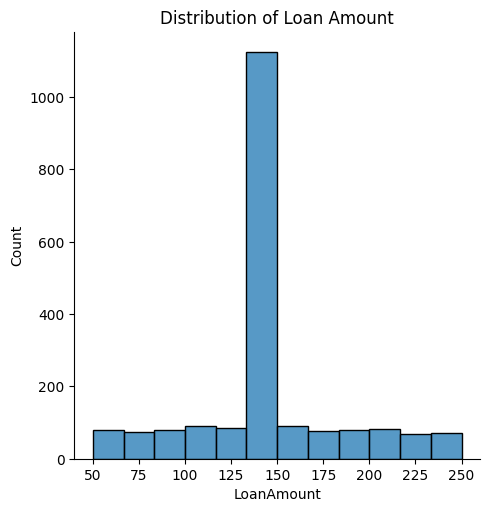

In [11]:
sns.displot(df['LoanAmount'])
plt.title('Distribution of Loan Amount')
plt.show()

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,2000.000000,2000.000000,2000.000000,1625.000000,1312.000000
mean,5875.827500,1180.154034,148.041623,220.283077,0.499238
std,2294.145071,1574.316402,39.144429,88.165030,0.500190
min,2000.000000,0.000000,50.000000,120.000000,0.000000
25%,3940.000000,0.000000,148.041623,120.000000,0.000000
50%,5804.000000,0.000000,148.041623,180.000000,0.000000
75%,7797.500000,2264.287417,148.041623,240.000000,1.000000
max,10000.000000,4997.889450,250.000000,360.000000,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()

In [17]:
ss.fit(df[['LoanAmount']])


StandardScaler()

In [18]:
ss.transform(df[['LoanAmount']])

array([[-3.84355720e-01],
       [ 9.18837513e-01],
       [ 1.44604443e-16],
       ...,
       [ 1.44604443e-16],
       [ 1.25102402e+00],
       [ 1.44604443e-16]], shape=(2000, 1))

In [21]:
new_df = df.copy()
new_df['loan_amount_ss'] = ss.transform(df[['LoanAmount']])

In [22]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_amount_ss
0,LP0001,Male,Yes,NaN,Graduate,2792,4597.524145,-3.843557e-01,360.0,NaN,Urban,Y,-3.843557e-01
1,LP0002,NaN,NaN,3+,NaN,5885,0.000000,9.188375e-01,120.0,1.0,Rural,Y,9.188375e-01
2,LP0003,Male,Yes,1,Graduate,3832,0.000000,1.499335e-16,120.0,0.0,Rural,Y,1.446044e-16
3,LP0004,Female,NaN,2,Not Grad,6119,0.000000,1.499335e-16,240.0,NaN,NaN,Y,1.446044e-16
4,LP0005,Male,NaN,0,Not Grad,6434,1071.799900,1.499335e-16,360.0,NaN,NaN,N,1.446044e-16


In [24]:
new_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,loan_amount_ss
count,2000.000000,2000.000000,2.000000e+03,1625.000000,1312.000000,2.000000e+03
mean,5875.827500,1180.154034,5.329071e-18,220.283077,0.499238,5.329071e-18
std,2294.145071,1574.316402,1.000250e+00,88.165030,0.500190,1.000250e+00
min,2000.000000,0.000000,-2.505239e+00,120.000000,0.000000,-2.505239e+00
25%,3940.000000,0.000000,1.499335e-16,120.000000,0.000000,1.446044e-16
50%,5804.000000,0.000000,1.499335e-16,180.000000,0.000000,1.446044e-16
75%,7797.500000,2264.287417,1.499335e-16,240.000000,1.000000,1.446044e-16
max,10000.000000,4997.889450,2.605323e+00,360.000000,1.000000,2.605323e+00


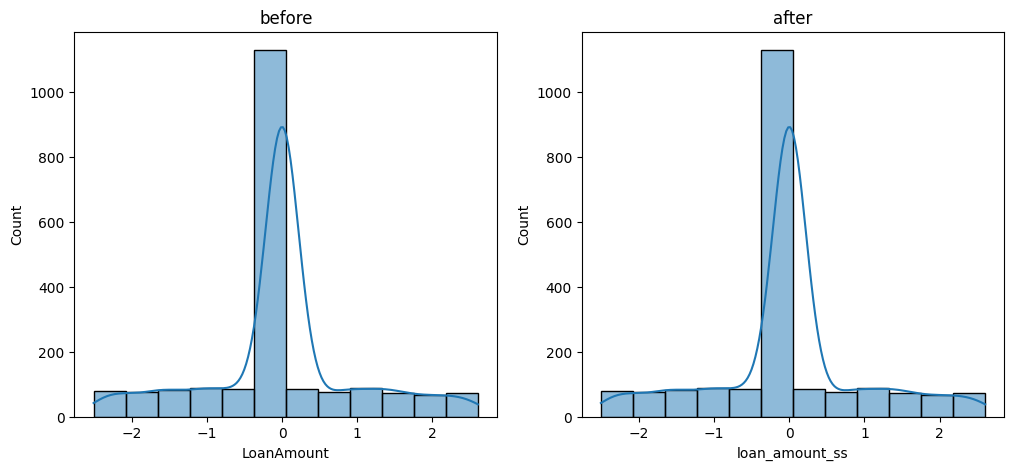

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("before")
sns.histplot(df['LoanAmount'], kde=True)

plt.subplot(1, 2, 2)
plt.title("after")
sns.histplot(new_df['loan_amount_ss'], kde=True)

plt.show()